## Blood vessel and MET relationships

### Distance

This notebook analyzes the distance of metastases (METs) to blood vessels, comparing monoclonal and polyclonal METs across different treatments (IV and MFP). 

Also utilizes normalized distance, where we calculate distnance relative to size of each MET

### Diameter: 
Calculate metrics about closes vessel thickness


- supp 6 a, b, c, 
- Fig 5d

In [1]:
#Read in file
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
#ignore warnings for seaborn ()
import warnings
#warnings.filterwarnings("ignore")

merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")
merged_df.head()

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25012\2788590175.py:10: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")


,MET_ID,1,10,11,100,101,110,111,Volume corrected,min_dist,...,id,clone_type,treatment,total_lung_volume,vessel_volume,vessel_surface_area,minor_axis,major_axis,elongation,met_type_cat
0,28.0,0.011735,0.167993,0.0,0.511050,0.000000,0.309223,0.0,2.202260e+08,0.000000,...,1064,1_2_4_6,IV,2.775850e+10,8.529756e+08,1.510170e+08,161.040177,337.000000,2.092645,polyclonal
1,50.0,0.998808,0.001192,0.0,0.000000,0.000000,0.000000,0.0,6.563523e+04,282.432010,...,1064,1_2,IV,2.775850e+10,8.529756e+08,1.510170e+08,13.000000,18.336258,1.410481,polyclonal
2,89.0,0.175399,0.099498,0.0,0.545721,0.179381,0.000000,0.0,1.246517e+08,15.761827,...,1064,1_2_4_5,IV,2.775850e+10,8.529756e+08,1.510170e+08,167.418006,376.000000,2.245876,polyclonal
3,119.0,0.974494,0.001366,0.0,0.024140,0.000000,0.000000,0.0,1.326004e+06,0.000000,...,1064,1_2_4,IV,2.775850e+10,8.529756e+08,1.510170e+08,37.469744,55.000000,1.467851,polyclonal
4,125.0,0.975769,0.000219,0.0,0.024012,0.000000,0.000000,0.0,1.016321e+07,0.000000,...,1064,1_2_4,IV,2.775850e+10,8.529756e+08,1.510170e+08,76.533946,111.000000,1.450337,polyclonal


The larger METs by function of their size are more likely to be closer to the blood vessels, hence by default they may have lower min_dist values. To account for this, we can get relative distances by dividing the min_dist by the radius of each tumour. 

* If value is 1, it means the distance is equal to the radius of the MET.
* If its <1, distance is smaller than MET radius, indicating it is closer to blood vessel relative to its own size
* If its >1, the MET is further away from blood vessel relative to its own size. 


The relative distance provides a measurement independent of MET size and is the relative closeness of a cell to the blood vessel compared to its own dimensions. 

As METS are not exactly spherical, we get volume of each Met, calculate the radius of a sphere of equivalent volume and add this as an extra column. 

Based on paper: https://www.nature.com/articles/s41598-021-00239-0

In [2]:
#define a function to get get radius given volume 
def get_radius(volume):
    return (3*volume/(4*np.pi))**(1/3)

#add a column for radius
merged_df['radius_met'] = merged_df['Volume corrected'].apply(get_radius)
#normalized min distance to radius_met
merged_df['min_dist_norm'] = merged_df['min_dist'] / merged_df['radius_met']
merged_df.head()


,MET_ID,1,10,11,100,101,110,111,Volume corrected,min_dist,...,treatment,total_lung_volume,vessel_volume,vessel_surface_area,minor_axis,major_axis,elongation,met_type_cat,radius_met,min_dist_norm
0,28.0,0.011735,0.167993,0.0,0.511050,0.000000,0.309223,0.0,2.202260e+08,0.000000,...,IV,2.775850e+10,8.529756e+08,1.510170e+08,161.040177,337.000000,2.092645,polyclonal,374.622027,0.000000
1,50.0,0.998808,0.001192,0.0,0.000000,0.000000,0.000000,0.0,6.563523e+04,282.432010,...,IV,2.775850e+10,8.529756e+08,1.510170e+08,13.000000,18.336258,1.410481,polyclonal,25.023581,11.286634
2,89.0,0.175399,0.099498,0.0,0.545721,0.179381,0.000000,0.0,1.246517e+08,15.761827,...,IV,2.775850e+10,8.529756e+08,1.510170e+08,167.418006,376.000000,2.245876,polyclonal,309.886884,0.050863
3,119.0,0.974494,0.001366,0.0,0.024140,0.000000,0.000000,0.0,1.326004e+06,0.000000,...,IV,2.775850e+10,8.529756e+08,1.510170e+08,37.469744,55.000000,1.467851,polyclonal,68.153062,0.000000
4,125.0,0.975769,0.000219,0.0,0.024012,0.000000,0.000000,0.0,1.016321e+07,0.000000,...,IV,2.775850e+10,8.529756e+08,1.510170e+08,76.533946,111.000000,1.450337,polyclonal,134.373652,0.000000


In [3]:
merged_df.columns

Index(['MET_ID', '1', '10', '11', '100', '101', '110', '111',
       'Volume corrected', 'min_dist', 'max_dist', 'mean_dist',
       'Nearest Vessel Thickness', 'Vessel Volume', 'Clone1', 'Clone2',
       'Clone3', 'Clone4', 'Clone5', 'Clone6', 'Clone7', 'Box.X.Min',
       'Box.X.Max', 'Box.Y.Min', 'Box.Y.Max', 'Box.Z.Min', 'Box.Z.Max',
       'MetNum_that_touches', 'number_of_touchPoints', 'total_touching_volume',
       'total_touching_surface_area/2', 'centroid_x', 'centroid_y',
       'centroid_z', 'id', 'clone_type', 'treatment', 'total_lung_volume',
       'vessel_volume', 'vessel_surface_area', 'minor_axis', 'major_axis',
       'elongation', 'met_type_cat', 'radius_met', 'min_dist_norm'],
      dtype='object')

### Comparison of using
- 'normalized distances' vs raw min distance
- use of median vs mean values

##### Median

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


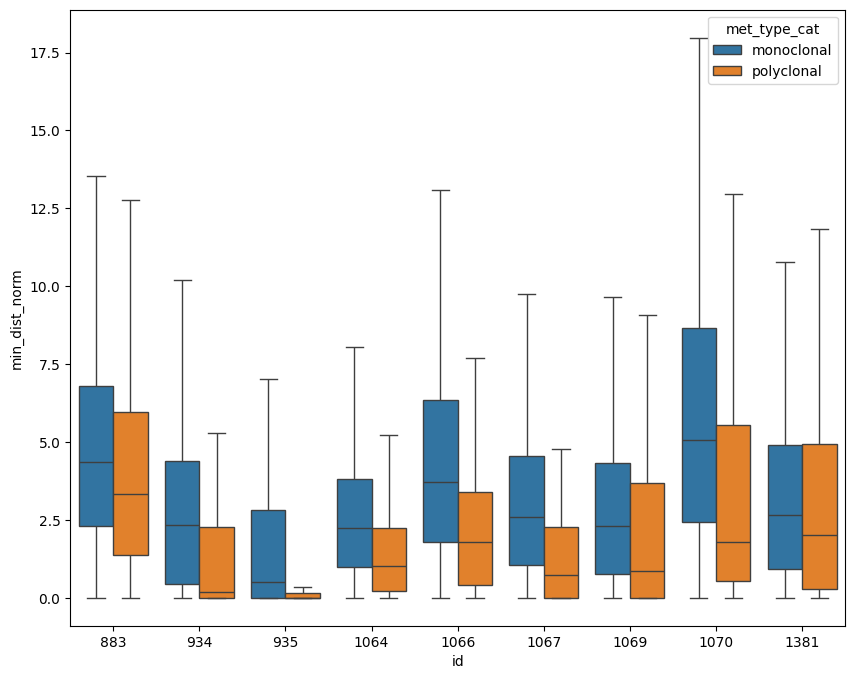

In [4]:
plt.figure(figsize=(10,8))
#ax = sns.violinplot(x='id',y='min_dist_norm',data=merged_df,hue='met_type_cat',hue_order=['monoclonal','polyclonal'],inner='point')
ax = sns.boxplot(x='id',y='min_dist_norm',data=merged_df,hue='met_type_cat',hue_order=['monoclonal','polyclonal'],showfliers=False)
plt.savefig("./final_graphs/supplementary/supp6b_normalised_distance_individual_mice_boxplot.eps", format="eps",dpi=300)

In [6]:
merged_df.columns

Index(['MET_ID', '1', '10', '11', '100', '101', '110', '111',
       'Volume corrected', 'min_dist', 'max_dist', 'mean_dist',
       'Nearest Vessel Thickness', 'Vessel Volume', 'Clone1', 'Clone2',
       'Clone3', 'Clone4', 'Clone5', 'Clone6', 'Clone7', 'Box.X.Min',
       'Box.X.Max', 'Box.Y.Min', 'Box.Y.Max', 'Box.Z.Min', 'Box.Z.Max',
       'MetNum_that_touches', 'number_of_touchPoints', 'total_touching_volume',
       'total_touching_surface_area/2', 'centroid_x', 'centroid_y',
       'centroid_z', 'id', 'clone_type', 'treatment', 'total_lung_volume',
       'vessel_volume', 'vessel_surface_area', 'minor_axis', 'major_axis',
       'elongation', 'met_type_cat', 'radius_met', 'min_dist_norm'],
      dtype='object')

nearest vessel diameter distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


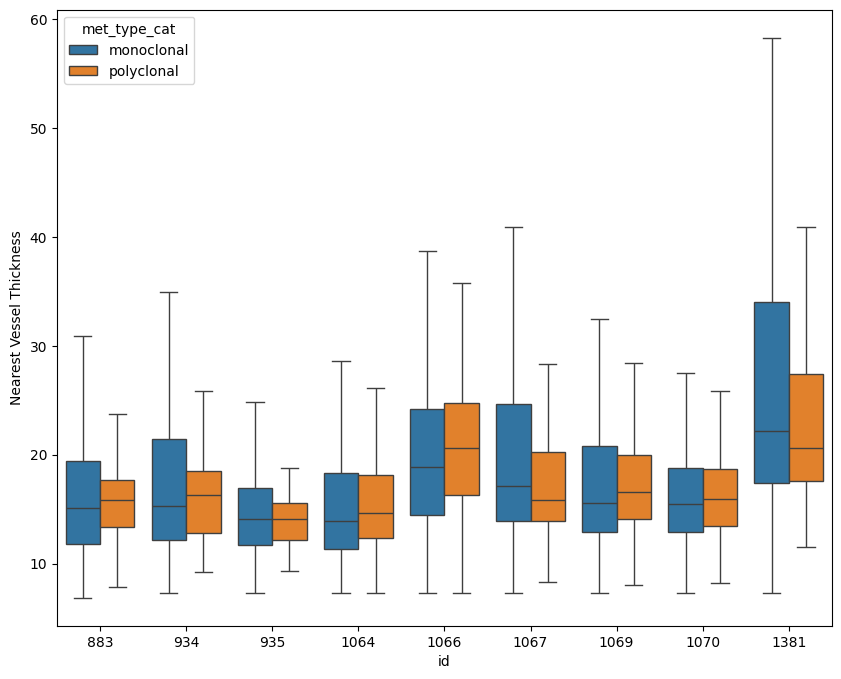

In [8]:
plt.figure(figsize=(10,8))
#ax = sns.violinplot(x='id',y='min_dist_norm',data=merged_df,hue='met_type_cat',hue_order=['monoclonal','polyclonal'],inner='point')
ax = sns.boxplot(x='id',y='Nearest Vessel Thickness',data=merged_df,hue='met_type_cat',hue_order=['monoclonal','polyclonal'],showfliers=False)
plt.savefig("./final_graphs/supplementary/suppc_nearest_vessel_diam_individual_mice_boxplot.eps", format="eps",dpi=300)

Calculate median distances for normalized and actual(raw) distances to blood vessels for each met

In [9]:
#normalized
dist_vol_norm = merged_df.groupby(['treatment','id','met_type_cat']).agg({'min_dist_norm':np.median}).reset_index()

#Raw min_dist
dist_raw = merged_df.groupby(['treatment','id','met_type_cat']).agg({'min_dist':np.median}).reset_index()


C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25012\2773872147.py:2: FutureWarning: The provided callable <function median at 0x000001CB35235CF0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dist_vol_norm = merged_df.groupby(['treatment','id','met_type_cat']).agg({'min_dist_norm':np.median}).reset_index()
C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25012\2773872147.py:5: FutureWarning: The provided callable <function median at 0x000001CB35235CF0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dist_raw = merged_df.groupby(['treatment','id','met_type_cat']).agg({'min_dist':np.median}).reset_index()


C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25012\2024673589.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(dist_raw, x='treatment',hue='met_type_cat', y='min_dist',color='black',dodge=True,legend=False)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


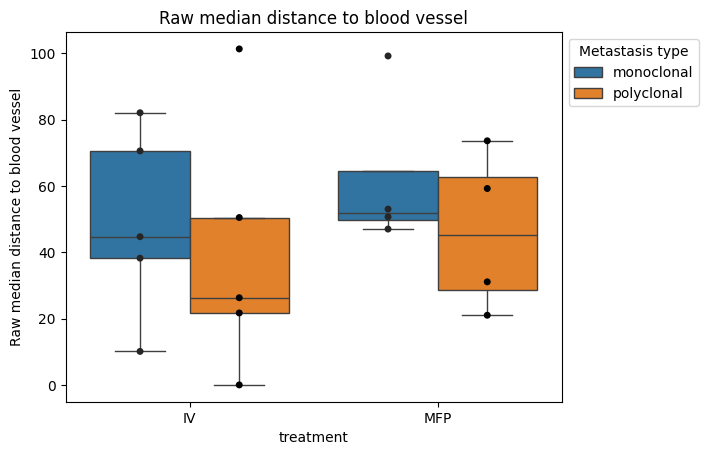

In [13]:
#sns.violinplot(dist_raw, x='treatment',hue='met_type_cat', y='min_dist',inner='point')

sns.boxplot(dist_raw, x='treatment',hue='met_type_cat', y='min_dist',showfliers=False)#,inner='point')
sns.swarmplot(dist_raw, x='treatment',hue='met_type_cat', y='min_dist',color='black',dodge=True,legend=False)
plt.ylabel("Raw median distance to blood vessel")
plt.title("Raw median distance to blood vessel")
plt.legend(title='Metastasis type',loc='upper left',bbox_to_anchor=(1,1))
plt.savefig("./final_graphs/supplementary/supp6a_raw_median_distance_vessel_boxplot.eps", format="eps",dpi=300)

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25012\902806670.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(dist_vol_norm, x='treatment',hue='met_type_cat', y='min_dist_norm',color="black",dodge=True,legend=False)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


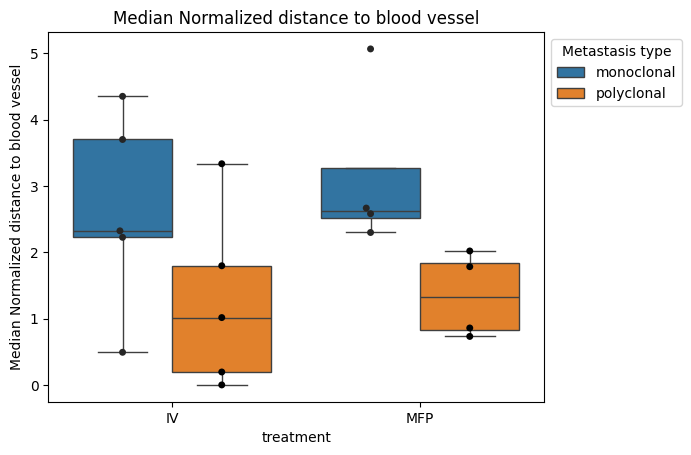

In [15]:
ax = sns.boxplot(dist_vol_norm, x='treatment',hue='met_type_cat', y='min_dist_norm',showfliers=False)#,inner='point')
sns.swarmplot(dist_vol_norm, x='treatment',hue='met_type_cat', y='min_dist_norm',color="black",dodge=True,legend=False)
plt.ylabel("Median Normalized distance to blood vessel")
plt.title("Median Normalized distance to blood vessel")
#plt.ylim(-2,9)
plt.legend(title='Metastasis type',loc='upper left',bbox_to_anchor=(1,1))

plt.savefig("./final_graphs/fig5/fig5d_relative_median_distance.eps", format="eps",dpi=300)

In [16]:
dist_vol_norm.to_csv("./final_graphs/fig5/fig5_relative_median_distance_data_fold_change.csv")

STATS ON NORMALIZED DATA GROUP

In [17]:
#stats
from scipy.stats import ttest_ind, ttest_rel

print("NORMALIZED MIN DISTANCE (MEDIAN)")


#t-test for monoclonal vs polyclonal for each treatment
iv_monoclonal_min_dist = dist_vol_norm[(dist_vol_norm['treatment']=='IV') & (dist_vol_norm['met_type_cat']=='monoclonal')]['min_dist_norm']
iv_polyclonal_min_dist = dist_vol_norm[(dist_vol_norm['treatment']=='IV') & (dist_vol_norm['met_type_cat']=='polyclonal')]['min_dist_norm']

mfp_monoclonal_min_dist = dist_vol_norm[(dist_vol_norm['treatment']=='MFP') & (dist_vol_norm['met_type_cat']=='monoclonal')]['min_dist_norm']
mfp_polyclonal_min_dist = dist_vol_norm[(dist_vol_norm['treatment']=='MFP') & (dist_vol_norm['met_type_cat']=='polyclonal')]['min_dist_norm']

#t-test 
iv_mono_poly_ttest = ttest_rel(iv_monoclonal_min_dist, iv_polyclonal_min_dist)
mfp_mono_poly_ttest = ttest_rel(mfp_monoclonal_min_dist, mfp_polyclonal_min_dist)

print(f"Monoclonal vs Polyclonal mets in the IV treatment group, the p-value is: {iv_mono_poly_ttest.pvalue:0.9f}")
print(f"Monoclonal vs Polyclonal mets in the MFP treatment group, the p-value is: {mfp_mono_poly_ttest.pvalue:0.9f}")

#t-test for IV vs MFP for each met type
iv_mfp_mono_ttest = ttest_ind(iv_monoclonal_min_dist, mfp_monoclonal_min_dist)
iv_mfp_poly_ttest = ttest_ind(iv_polyclonal_min_dist, mfp_polyclonal_min_dist)

print(f"Monoclonal mets in the IV vs MFP treatment group, the p-value is: {iv_mfp_mono_ttest.pvalue:0.9f}")
print(f"Polyclonal mets in the IV vs MFP treatment group, the p-value is: {iv_mfp_poly_ttest.pvalue:0.9f}")

NORMALIZED MIN DISTANCE (MEDIAN)
Monoclonal vs Polyclonal mets in the IV treatment group, the p-value is: 0.010600884
Monoclonal vs Polyclonal mets in the MFP treatment group, the p-value is: 0.046859028
Monoclonal mets in the IV vs MFP treatment group, the p-value is: 0.589232143
Polyclonal mets in the IV vs MFP treatment group, the p-value is: 0.917684810


STATS ON RAW DATA GROUP

In [18]:

print("RAW UNNORMALIZED MIN DISTANCE (MEDIAN)")
#t-test for monoclonal vs polyclonal for each treatment
iv_monoclonal_min_dist_raw = dist_raw[(dist_raw['treatment']=='IV') & (dist_raw['met_type_cat']=='monoclonal')]['min_dist']
iv_polyclonal_min_dist_raw = dist_raw[(dist_raw['treatment']=='IV') & (dist_raw['met_type_cat']=='polyclonal')]['min_dist']

mfp_monoclonal_min_dist_raw = dist_raw[(dist_raw['treatment']=='MFP') & (dist_raw['met_type_cat']=='monoclonal')]['min_dist']
mfp_polyclonal_min_dist_raw = dist_raw[(dist_raw['treatment']=='MFP') & (dist_raw['met_type_cat']=='polyclonal')]['min_dist']

#t-test 
iv_mono_poly_ttest_raw = ttest_rel(iv_monoclonal_min_dist_raw, iv_polyclonal_min_dist_raw)
mfp_mono_poly_ttest_raw = ttest_rel(mfp_monoclonal_min_dist_raw, mfp_polyclonal_min_dist_raw)

print(f"Monoclonal vs Polyclonal mets in the IV treatment group, the p-value is: {iv_mono_poly_ttest_raw.pvalue:0.9f}")
print(f"Monoclonal vs Polyclonal mets in the MFP treatment group, the p-value is: {mfp_mono_poly_ttest_raw.pvalue:0.9f}")

#t-test for IV vs MFP for each met type
iv_mfp_mono_ttest_raw = ttest_ind(iv_monoclonal_min_dist_raw, mfp_monoclonal_min_dist_raw)
iv_mfp_poly_ttest_raw = ttest_ind(iv_polyclonal_min_dist_raw, mfp_polyclonal_min_dist_raw)

print(f"Monoclonal mets in the IV vs MFP treatment group, the p-value is: {iv_mfp_mono_ttest_raw.pvalue:0.9f}")
print(f"Polyclonal mets in the IV vs MFP treatment group, the p-value is: {iv_mfp_poly_ttest_raw.pvalue:0.9f}")

RAW UNNORMALIZED MIN DISTANCE (MEDIAN)
Monoclonal vs Polyclonal mets in the IV treatment group, the p-value is: 0.288468153
Monoclonal vs Polyclonal mets in the MFP treatment group, the p-value is: 0.135989038
Monoclonal mets in the IV vs MFP treatment group, the p-value is: 0.482060972
Polyclonal mets in the IV vs MFP treatment group, the p-value is: 0.787003462
